In [1]:
# Importando as biblioteca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Importando dataset de Treino
df_treino = pd.read_csv("train.csv")

In [3]:
# Importando dataset de Teste
df_test = pd.read_csv("test.csv")

In [4]:
# Visualizando os dados
df_treino.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
# Visualizando os dados
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
# Tamanho do dataset
df_treino.shape

(8693, 14)

In [7]:
# Tamanho do dataset
df_test.shape

(4277, 13)

In [8]:
# Visualizando valores NaN em cada coluna
df_treino.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
# Visualizando valores NaN em cada coluna
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [10]:
# Unindo os dataset
df_treino["fold"] = 1
df_test["fold"] = 2
df_total = pd.concat([df_treino,df_test])
df_total.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,fold
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1


In [11]:
# Informações sobre o dataset
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  fold          12970 non-null  int64  
dtypes: float64(6), int64(1), object(8)
memory usage: 1.6+ MB


In [12]:
# Tamanho do dataset
df_total.shape

(12970, 15)

In [13]:
# Visualizando valores NaN em cada coluna
df_total.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
fold               0
dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

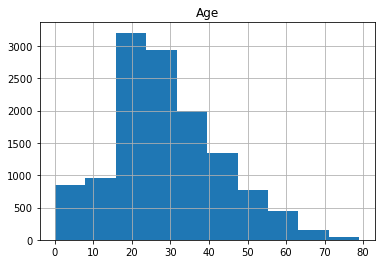

In [14]:
# Verificando a media de idade
df_total.hist('Age')

In [15]:
# Preenchendo os valores NaN com a mediana
df_total['Age'] = df_total['Age'].fillna(df_total['Age'].median())

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

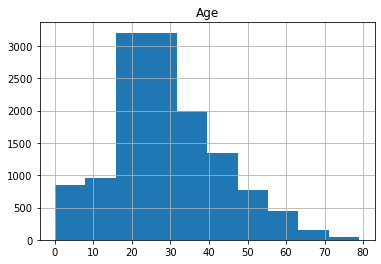

In [16]:
# Verificando a media de idade depois de preencher os valores NaN com a mediana
df_total.hist('Age')

/Users/Gugah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

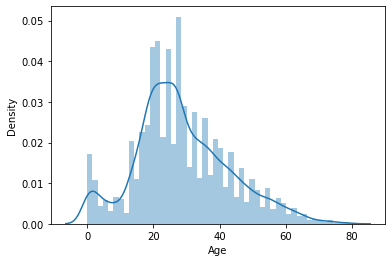

In [17]:
# Verificando a media de idade
sns.distplot(df_total['Age'])

In [18]:
# Visualizando valores NaN na coluna Age
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12970 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  fold          12970 non-null  int64  
dtypes: float64(6), int64(1), object(8)
memory usage: 1.6+ MB


In [19]:
# Visualizando a coluna HomePlanet
df_total['HomePlanet'].value_counts()

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

Text(0.5, 1.0, 'Distribuição de Passageiros de diferentes planetas')

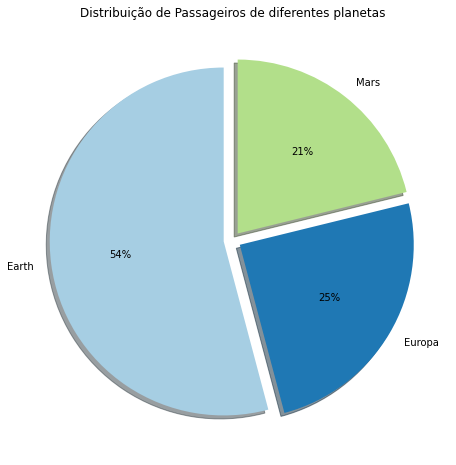

In [20]:
# Grafico de Pizza para visualizar distribuição de passageiros de diferentes planetas
HomePlanet = df_total.HomePlanet
plt.figure(figsize=(12,8))
colors = sns.color_palette('Paired')
explode = (0.05, 0.05, 0.05)
plt.pie(x = HomePlanet.value_counts().values, labels=HomePlanet.value_counts().index,
       explode=explode,startangle=90, colors=colors, shadow=True, autopct='%.0f%%')
plt.title('Distribuição de Passageiros de diferentes planetas')

In [21]:
# Fazendo a transformação de objeto para numero float
df_total['HomePlanet'] = LabelEncoder().fit_transform(df_total['HomePlanet'])

In [22]:
df_total['HomePlanet'] = np.where(df_total['HomePlanet'] < 3, df_total['HomePlanet'], np.nan)

In [23]:
# Preenchendo os valores NaN com a media
df_total['HomePlanet'] = df_total['HomePlanet'].fillna(int(df_total['HomePlanet'].mean()))

In [24]:
# Visualizando novamente a coluna HomePlanet
# Terra = 0
# Europa = 1
# Mars = 2
df_total['HomePlanet'].value_counts()

0.0    7153
1.0    3133
2.0    2684
Name: HomePlanet, dtype: int64

<AxesSubplot:ylabel='HomePlanet'>

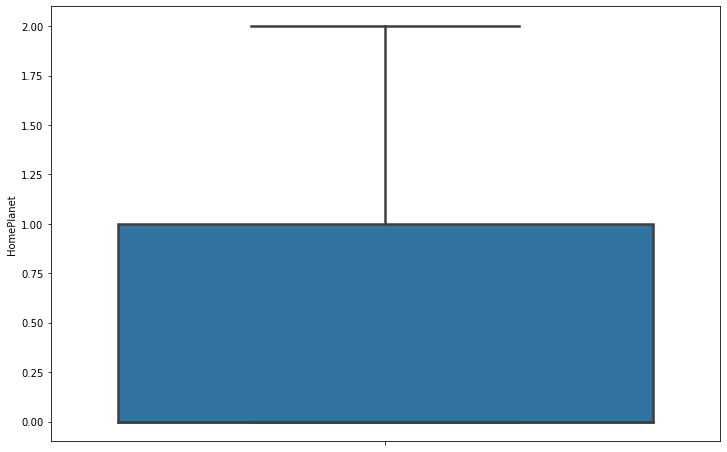

In [25]:
# Boxplot aqui podemos visualizar os valores Outliers
fig = plt.figure(figsize=(12,8))
sns.boxplot(data = df_total, y = "HomePlanet", linewidth=2.5)

In [26]:
# Visualizando novamente a coluna HomePlanet
# Terra = 0
# Europa = 1
# Mars = 2
df_total['HomePlanet'].value_counts()

0.0    7153
1.0    3133
2.0    2684
Name: HomePlanet, dtype: int64

/Users/Gugah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HomePlanet', ylabel='Density'>

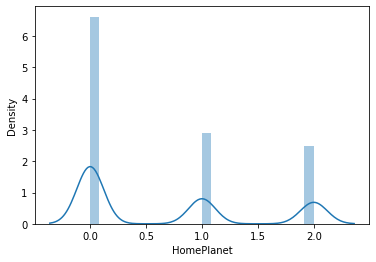

In [27]:
# Verificando a coluna HomePlanet
sns.distplot(df_total['HomePlanet'])

In [28]:
# Visualizando a coluna CryoSleep
df_total['CryoSleep'].value_counts()

False    8079
True     4581
Name: CryoSleep, dtype: int64

In [29]:
# Fazendo a transformação de objeto para numero float
df_total['CryoSleep'] = LabelEncoder().fit_transform(df_total['CryoSleep'])

In [30]:
# Visualizando novamente a coluna CryoSleep
# False = 0
# True = 1
# NaN = 2
df_total['CryoSleep'].value_counts()

0    8079
1    4581
2     310
Name: CryoSleep, dtype: int64

In [31]:
df_total['CryoSleep'] = np.where(df_total['CryoSleep'] < 2, df_total['CryoSleep'], np.nan)

In [32]:
# Preenchendo os valores NaN com a media
df_total['CryoSleep'] = df_total['CryoSleep'].fillna(int(df_total['CryoSleep'].mean()))

In [33]:
# Visualizando novamente a coluna CryoSleep
# False = 0
# True = 1
df_total['CryoSleep'].value_counts()

0.0    8389
1.0    4581
Name: CryoSleep, dtype: int64

In [34]:
# Apagando a Coluna Name e Cabin
del df_total['Name']
del df_total['Cabin']

In [35]:
df_total.head(10)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,fold
0,0001_01,1.0,0.0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1
1,0002_01,0.0,0.0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1
2,0003_01,1.0,0.0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1
3,0003_02,1.0,0.0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1
4,0004_01,0.0,0.0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1
5,0005_01,0.0,0.0,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True,1
6,0006_01,0.0,0.0,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True,1
7,0006_02,0.0,1.0,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,True,1
8,0007_01,0.0,0.0,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True,1
9,0008_01,1.0,1.0,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True,1


In [40]:
df_total.corr()

,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,fold
HomePlanet,1.000000,0.088630,0.139440,0.218319,0.065733,0.109956,0.052755,0.036717,0.009986
CryoSleep,0.088630,1.000000,-0.064196,-0.254352,-0.210556,-0.218003,-0.201455,-0.192238,0.011448
Age,0.139440,-0.064196,1.000000,0.066921,0.122391,0.034696,0.117158,0.101120,-0.005528
RoomService,0.218319,-0.254352,0.066921,1.000000,-0.020146,0.057402,0.008936,-0.023847,-0.003937
FoodCourt,0.065733,-0.210556,0.122391,-0.020146,1.000000,-0.001589,0.228990,0.244279,-0.005514
ShoppingMall,0.109956,-0.218003,0.034696,0.057402,-0.001589,1.000000,0.010504,0.004485,0.002840
Spa,0.052755,-0.201455,0.117158,0.008936,0.228990,0.010504,1.000000,0.149874,-0.003362
VRDeck,0.036717,-0.192238,0.101120,-0.023847,0.244279,0.004485,0.149874,1.000000,0.002334
fold,0.009986,0.011448,-0.005528,-0.003937,-0.005514,0.002840,-0.003362,0.002334,1.000000


In [42]:
# Visualizando novamente a coluna Destination
# False = 0
# True = 1
df_total['Destination'].value_counts()

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

In [47]:
df_total.describe()

,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,fold
count,12970.000000,12970.000000,12970.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000,12970.000000
mean,0.655436,0.353200,28.735081,222.897852,451.961675,174.906033,308.476904,306.789482,1.329761
std,0.799855,0.477983,14.238958,647.596664,1584.370747,590.558690,1130.279641,1180.097223,0.470144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,37.000000,49.000000,77.000000,29.000000,57.000000,42.000000,2.000000
max,2.000000,1.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,2.000000


In [45]:
corr_df = df_total.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,fold
HomePlanet,1.000000,0.088630,0.139440,0.218319,0.065733,0.109956,0.052755,0.036717,0.009986
CryoSleep,0.088630,1.000000,-0.064196,-0.254352,-0.210556,-0.218003,-0.201455,-0.192238,0.011448
Age,0.139440,-0.064196,1.000000,0.066921,0.122391,0.034696,0.117158,0.101120,-0.005528
RoomService,0.218319,-0.254352,0.066921,1.000000,-0.020146,0.057402,0.008936,-0.023847,-0.003937
FoodCourt,0.065733,-0.210556,0.122391,-0.020146,1.000000,-0.001589,0.228990,0.244279,-0.005514
ShoppingMall,0.109956,-0.218003,0.034696,0.057402,-0.001589,1.000000,0.010504,0.004485,0.002840
Spa,0.052755,-0.201455,0.117158,0.008936,0.228990,0.010504,1.000000,0.149874,-0.003362
VRDeck,0.036717,-0.192238,0.101120,-0.023847,0.244279,0.004485,0.149874,1.000000,0.002334
fold,0.009986,0.011448,-0.005528,-0.003937,-0.005514,0.002840,-0.003362,0.002334,1.000000


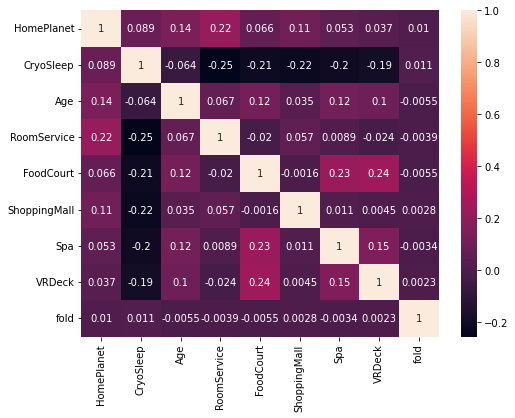

In [44]:
corr_df = df_total.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()